# Purpose
Doing data mining on web, housing data in my case, some website don't feel happy 
when you tried to steal information from them. 
They want to prevent you from doing so, for example instead of showing housing price in plain text, 
they show them in image so your web scrapper will not be able to extract the numerical value from that image.
This is when a digit classifier comes into play. 

## Build a digit classifier to detect price tag i use TFLearn, a high-level api built on Tensorflow. 
##### step 1: Build data set. 
##### step 2: Label every digit in the dataset.

## Dependancies

In [7]:
import cv2
import numpy as np
import pandas as pd

## 1. Build data set.
To collect none hand-written digits resources on internet is time consuming. But with Photoshop i can build my own data set quickly. Duplicate the digits over and over, by only changing their font type, this is what i've got. 

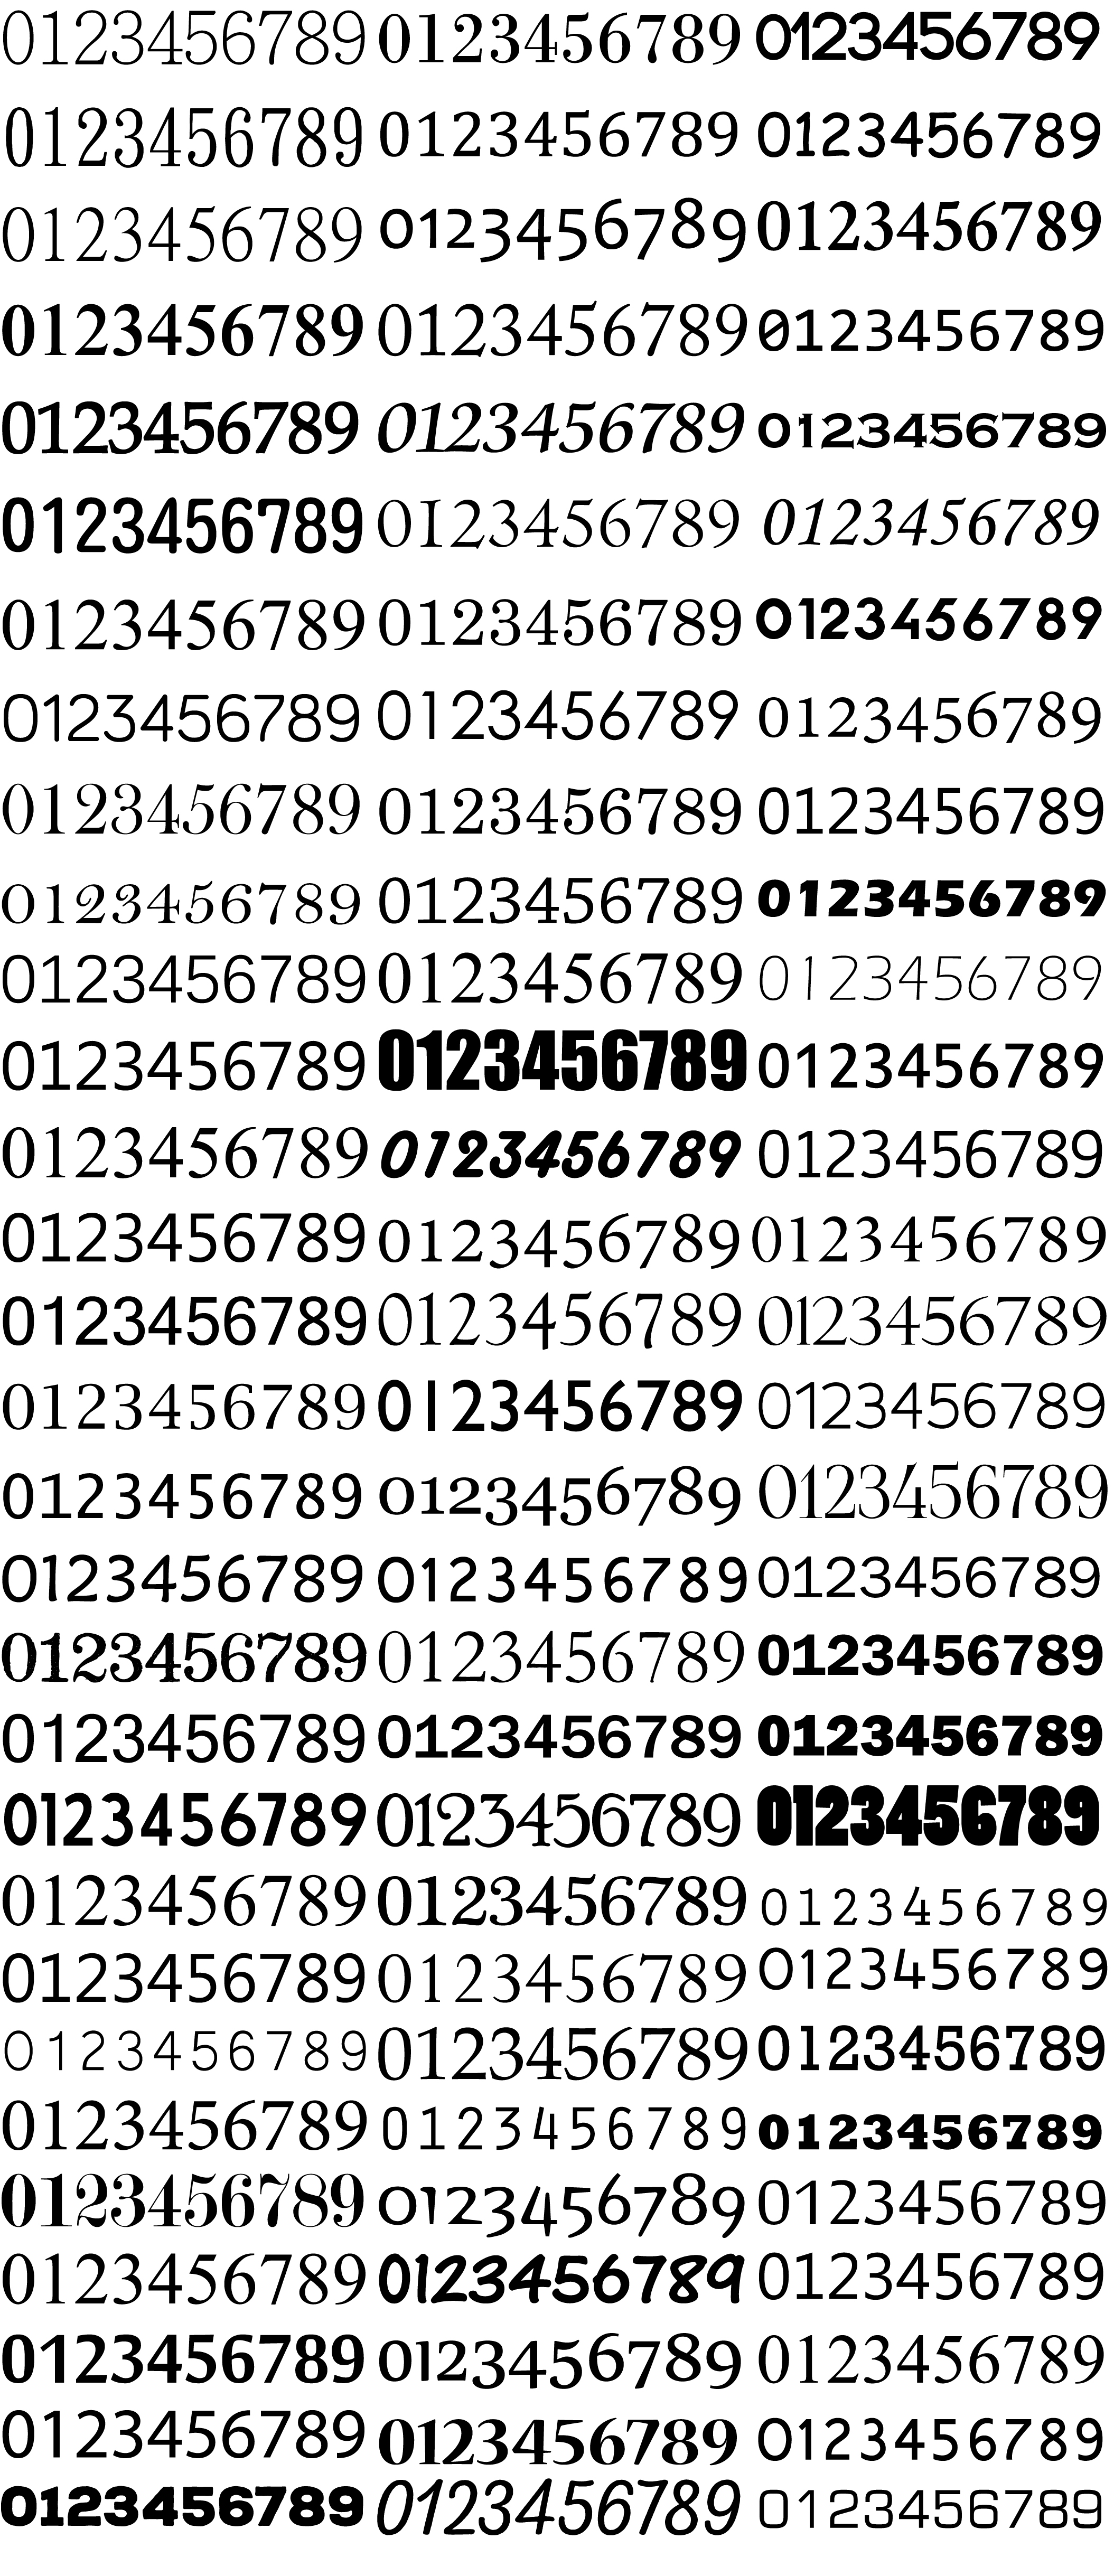

In [6]:
from IPython.display import Image
Image(filename='images/digits_Set.jpg', width=600) 

#### 1.1 Loading image
Load the image above.

In [13]:
image1 = cv2.imread('images/digits_Set.jpg', 0)
image1_colored = cv2.imread('images/digits_Set.jpg')

#### 1.2 Digits extraction

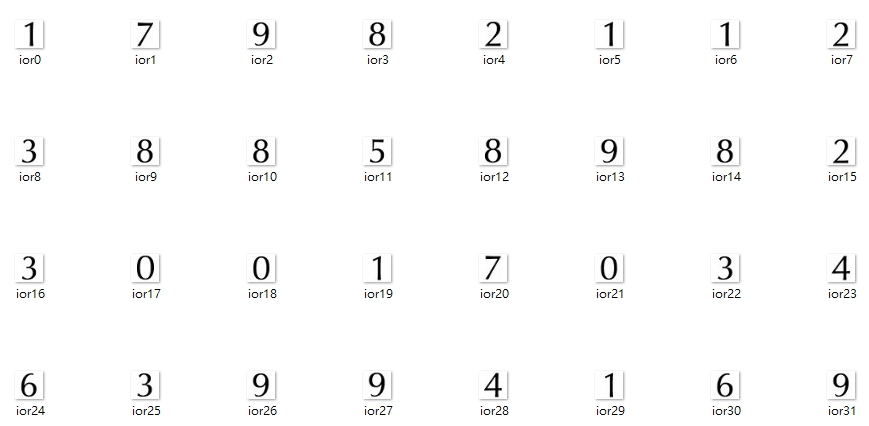

In [22]:
#The goal is to extract all of the digits from image to build our own data set.
from IPython.display import Image
Image(filename='images/extraction.jpg')

In [9]:
def ROIs(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY)
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    _, rois, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return rois

In [10]:
def sortContours(cnts):
    boundingBoxes = [cv2.boundingRect(cnt) for cnt in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key = lambda x:x[1][0], reverse=True))
    return (cnts, boundingBoxes)

In [11]:
def ROI_EXtraction(cnt, sourceImg, sizeLimit=250, resize=28, padding=2):
    x, y, w, h = cv2.boundingRect(cnt)
    if (w*h > sizeLimit):
        _length = h + padding
        _widthOffset = int((_length - w + padding) / 2)
        roi = sourceImg.copy()
        roi = roi[y-padding:y+h+padding,x-_widthOffset:x+_widthOffset+w]
        roi[0:-1,0:_widthOffset] = 255
        roi[0:-1,w + _widthOffset:] = 255
        return roi.reshape((resize, resize))

In [14]:
path = 'digits_dataset/'
size = 28
labels = []

cnts = ROIs(image1)[1:-1]
(sorted_cnts, boundingBoxes) = sortContours(cnts)
for roi in sorted_cnts:
    output = ROI_EXtraction(roi, image1)
    output = cv2.resize(output, (size, size))
    full_path = path + 'ior{}.jpg'.format(counter)
    cv2.imwrite(full_path, output)

#### 1.3 Resize images to 28X28

In [24]:
import cv2

path = r'digits_dataset/all/' 
files = os.listdir(path) # Get all digit images
_size = 28 # Width and height should be 28 pixels

#Resize all digit images
for file in files:
    fullPath = ior_folder + file
    image = cv2.imread(fullPath)
    image = cv2.resize(image, (_size, _size))
    cv2.imwrite(fullPath, image)

## 2 Labels

#### 2.1 Sorting files
Creating labels can be tedious, but dealing the images in orders can make the process much faster, like the picture below.

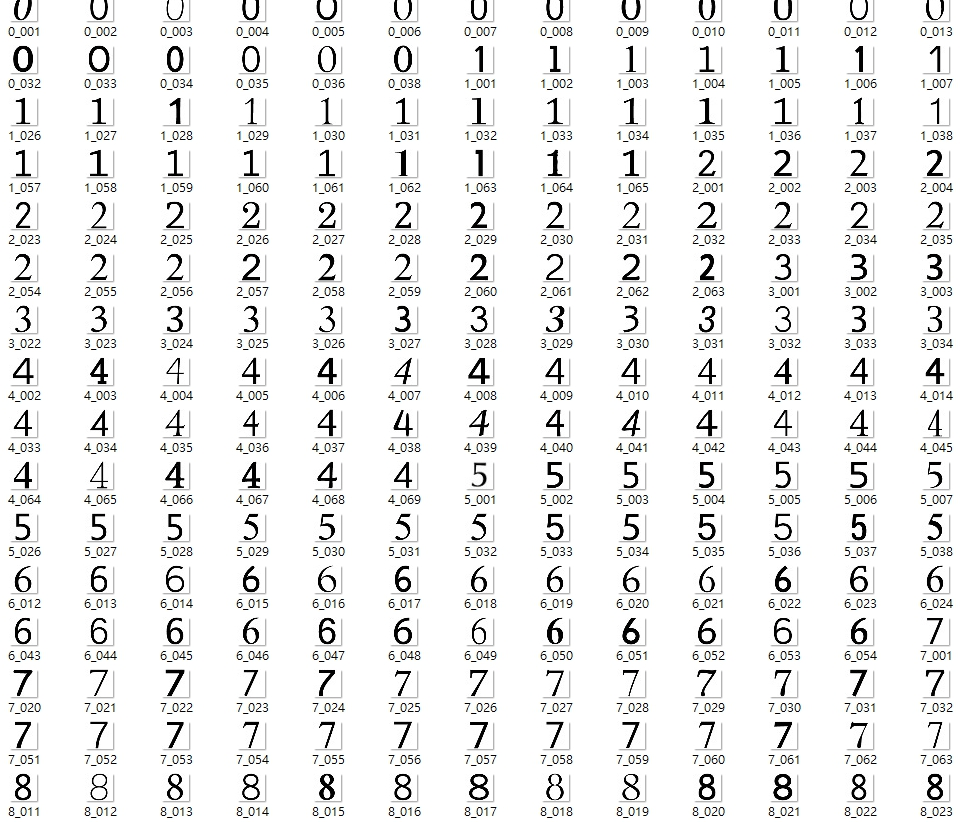

In [5]:
from IPython.display import Image
Image(filename='images/imgInOrders.jpg', width=600)

#### 2.1 Separate 

In [13]:
import os

def digits_sorted():
    ior_folder = r'digits_dataset/all/'
    files = os.listdir(ior_folder)
    digits = []
    for number in range(10):
        # Separating digits by storing images of the same digits to the same array. 
        # EP:[['digit_0_001.jpg','digit_0_002.jpg'],['digit_1_001.jpg','digit_1_002.jpg']]
        numbers = [file for file in files if int(file.split('_')[0]) == i]
        array.append(i_members)
    return digits
    
digits = digits_sorted()

In [16]:
labels = []
for index, digit in enumerate(digits):
    for member in digit:
        labels.append(index)

#### 2.2 Labeling
Now the work is just simple, by knowing how many images for each digit, giving labels of the same amount and go all the way down. Create a csv file to store those labels.

In [ ]:
import csv
def labels_CSV(labels, path='labels/labels2.csv'):
    hs = open(path,"a")
    hs.write("class\n")
    for label in labels:
        hs.write(str(label) + "\n")
    hs.close()

In [22]:
labels_CSV(labels)